# DTW with recorded coordinates - swingSame

## Load CSV & Import Libraries

In [1]:
import numpy as np
from fastdtw import dtw
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
df = pd.read_csv('../../data/csv/swingSame.csv', sep=',', header=None)
df.columns = df.iloc[0]
df = df[1:]

In [3]:
df.head()

,t,0_y0,0_x0,0_s0,0_y1,0_x1,0_s1,0_y2,0_x2,0_s2,...,1_s13,1_y14,1_x14,1_s14,1_y15,1_x15,1_s15,1_y16,1_x16,1_s16
1,0.6212711334228516,0.36415362,0.31265363,0.60582286,0.35385332,0.3201993,0.6713132,0.35552782,0.30514586,0.67169404,...,0.85096806,0.74190927,0.793793,0.9345154,0.8630787,0.87179816,0.87878174,0.86216605,0.78050107,0.8425345
2,0.7828221321105957,0.36419964,0.31268308,0.60935616,0.3538588,0.32026652,0.67405313,0.35554647,0.30519724,0.67468196,...,0.8566462,0.74190784,0.79351443,0.9373098,0.86296266,0.87195456,0.8834153,0.86226666,0.78053945,0.838721
3,0.898500919342041,0.3640619,0.31265578,0.61185825,0.35376102,0.32023492,0.6626203,0.35554904,0.30519828,0.67665225,...,0.85711807,0.7413759,0.7933621,0.9417498,0.86278,0.8719906,0.8839017,0.86204004,0.78055376,0.83299226
4,1.0211598873138428,0.36412698,0.31263438,0.6029603,0.35383284,0.32022256,0.6637276,0.3555774,0.3052029,0.67876726,...,0.8603307,0.7419731,0.7933856,0.9382718,0.8629164,0.8719587,0.8850268,0.86199874,0.7806138,0.8500149
5,1.1328487396240234,0.36420673,0.3124946,0.57980716,0.3540221,0.32011458,0.6608614,0.35548687,0.30514917,0.68382937,...,0.8691675,0.74282753,0.7929862,0.9385414,0.86300266,0.8719636,0.8890346,0.8621541,0.7805807,0.8529795


In [4]:
# Remove first column (time)
df = df.drop(df.columns[0], axis=1)

## Devide into two person & Normalized Vector

In [5]:
# Devide to two person
firstPose = df.iloc[:,15:51]
secondPose = df.iloc[:,66:]

In [6]:
### Vector List
vectorList = [
    [0,1],
    [0,2],
    [1,3],
    [2,4],
    [3,5],
    [0,6],
    [1,7],
    [6,7],
    [6,8],
    [7,9],
    [8,10],
    [9,11]
]

In [7]:
firstPose

,0_y5,0_x5,0_s5,0_y6,0_x6,0_s6,0_y7,0_x7,0_s7,0_y8,...,0_s13,0_y14,0_x14,0_s14,0_y15,0_x15,0_s15,0_y16,0_x16,0_s16
1,0.44173706,0.3506127,0.9201322,0.44487894,0.27518973,0.9060152,0.4293496,0.3967956,0.5853695,0.42870936,...,0.8773963,0.7425353,0.27238834,0.9402943,0.8610461,0.35014376,0.8978008,0.8573383,0.2597147,0.9121352
2,0.4420447,0.35082826,0.92330265,0.44508195,0.27509686,0.90290695,0.42921418,0.3970047,0.58250177,0.42910457,...,0.8741156,0.7424438,0.27245173,0.9364516,0.86098284,0.35021502,0.89721304,0.85733724,0.2597026,0.91131574
3,0.44205844,0.35080808,0.92163944,0.44520077,0.27528343,0.90613425,0.4301741,0.3966584,0.58890855,0.42901915,...,0.8627815,0.7425735,0.27226707,0.9355462,0.86116946,0.3501731,0.89830613,0.85726017,0.25975564,0.9123075
4,0.44179922,0.35093638,0.9216961,0.44452095,0.27499047,0.9016942,0.43009314,0.3968009,0.6075662,0.42896253,...,0.8605653,0.7431438,0.2722635,0.9352125,0.86114323,0.35011053,0.89280516,0.85734004,0.25968617,0.91316974
5,0.4416934,0.35067937,0.9212996,0.44476527,0.27510554,0.90595084,0.43042994,0.39660984,0.6159326,0.4289485,...,0.8639207,0.74282885,0.27228203,0.93635887,0.86114955,0.35014194,0.8997893,0.8571485,0.25976986,0.90877384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,0.4271701,0.27486214,0.86239874,0.45862374,0.221241,0.9267178,0.36817035,0.31267032,0.76260066,0.53980106,...,0.80238914,0.7387841,0.21536231,0.8764296,0.8516509,0.32331157,0.89796257,0.85509,0.23316713,0.8865512
1381,0.43094486,0.27394962,0.9133846,0.45093185,0.21920489,0.95607877,0.38787633,0.3196009,0.71179324,0.5174184,...,0.81106496,0.7361357,0.21817902,0.931912,0.85344326,0.31091532,0.7988415,0.8559685,0.23312974,0.9043992
1382,0.438025,0.27744988,0.91321236,0.44380414,0.21708874,0.9138493,0.41418016,0.32665882,0.73777664,0.49364954,...,0.83801323,0.73579854,0.22095934,0.923605,0.85575426,0.2961661,0.8275714,0.8543436,0.23222649,0.8683015
1383,0.43933496,0.28051192,0.8961121,0.44283557,0.21373199,0.93838865,0.43483686,0.330639,0.7004108,0.4771551,...,0.86833423,0.7353954,0.22471416,0.9040652,0.8565783,0.2819493,0.8992061,0.85400355,0.23158371,0.8752572


In [8]:
### Reshape Each Person's Body Pose
firstPoseArray = firstPose.values
firstPoseArray = firstPoseArray.reshape(1384, 12, 3)

secondPoseArray = secondPose.values
secondPoseArray = secondPoseArray.reshape(1384, 12, 3)

In [9]:
### Change each coordinate to normalized vector

firstPoseVectorNorm = []
secondPoseVectorNorm = []

# Calculate first pose's normalized vector and confidence level
for row in firstPoseArray:
    tempVectorsRow = []
    for i in vectorList:
        tempY = float(row[i[1],0]) - float(row[i[0],0])
        tempX = float(row[i[1],1]) - float(row[i[0],1])
        tempVector = np.array([tempX, tempY])    # Get Raw Vector
        normalizedTempVector = tempVector / np.linalg.norm(tempVector)    # Vector Normalization
        tempS = (float(row[i[1],2]) + float(row[i[0],2]))/2    # Get Confidence Level (simple average)
        tempVectorsRow.append([normalizedTempVector[0],normalizedTempVector[1],tempS])
    firstPoseVectorNorm.append(tempVectorsRow)
    
# Calculate second pose's normalized vector and confidence level
for row in secondPoseArray:
    tempVectorsRow = []
    for i in vectorList:
        tempY = float(row[i[1],0]) - float(row[i[0],0])
        tempX = float(row[i[1],1]) - float(row[i[0],1])
        tempVector = np.array([tempX, tempY])    # Get Raw Vector
        normalizedTempVector = tempVector / np.linalg.norm(tempVector)    # Vector Normalization
        tempS = (float(row[i[1],2]) + float(row[i[0],2]))/2    # Get Confidence Level (simple average)
        tempVectorsRow.append([normalizedTempVector[0],normalizedTempVector[1],tempS])
    secondPoseVectorNorm.append(tempVectorsRow)

In [10]:
### Remove confidnece factors in the list

firstPoseVectorNorm_withoutConf = [[element[:2] for element in row] for row in firstPoseVectorNorm]
secondPoseVectorNorm_withoutConf = [[element[:2] for element in row] for row in secondPoseVectorNorm]

## Compare each list with DTW_WHOLE?

In [11]:
# Convert to numpy array
tempFirstPose = np.array(firstPoseVectorNorm_withoutConf)
tempSecondPose = np.array(secondPoseVectorNorm_withoutConf)

# reshape the 3D arrays into 2D arrays for DTW
firstPoseVectorNorm_withoutConf_2D = tempFirstPose.reshape(tempFirstPose.shape[0], -1)
secondPoseVectorNorm_withoutConf_2D = tempSecondPose.reshape(tempSecondPose.shape[0], -1)

In [12]:
# # Compute the DTW distance and the optimal warping path
# distance, path = dtw(array1_2d, array2_2d, dist=lambda array1_2d, array2_2d: np.linalg.norm(array1_2d - array2_2d, ord=2))

# # Create a plot showing the input sequences and the optimal warping path
# plt.plot(array1_2d[:, 0], array1_2d[:, 1], label='x')
# plt.plot(array2_2d[:, 0], array2_2d[:, 1], label='y')
# plt.plot([path[i][0] for i in range(len(path))], [path[i][1] for i in range(len(path))], 'r--', label='Warping path')
# plt.legend()
# plt.show()

# # Print the DTW distance
# print(f"DTW distance: {distance}")

In [13]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
from dtaidistance import dtw_ndim

d = dtw_ndim.distance(firstPoseVectorNorm_withoutConf_2D, secondPoseVectorNorm_withoutConf_2D)

In [14]:
d

40.635657148088015

## Compare poses with each body part (DTW)

In [15]:
np.shape(firstPoseVectorNorm_withoutConf_2D)

(1384, 24)

In [16]:
# Slice the array to get 12 2D arrays with shape (1384, 2)
firstPoseVectorNorm_eachBody = [firstPoseVectorNorm_withoutConf_2D[:, i:i+2] for i in range(0, firstPoseVectorNorm_withoutConf_2D.shape[1], 2)]
secondPoseVectorNorm_eachBody = [secondPoseVectorNorm_withoutConf_2D[:, i:i+2] for i in range(0, secondPoseVectorNorm_withoutConf_2D.shape[1], 2)]

In [17]:
np.shape(firstPoseVectorNorm_eachBody)

(12, 1384, 2)

In [18]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

path = dtw.warping_path(firstPoseVectorNorm_eachBody[0].flatten(), secondPoseVectorNorm_eachBody[0].flatten())
dtwvis.plot_warping(firstPoseVectorNorm_eachBody[0].flatten(), secondPoseVectorNorm_eachBody[0].flatten(), path, filename="warp.png")

(None, None)

In [19]:
x = firstPoseVectorNorm_eachBody[0].flatten()
y = secondPoseVectorNorm_eachBody[0].flatten()

In [20]:
from fastdtw import dtw

# Compute the DTW distance between the arrays
distance, path = dtw(x, y)

# Print the DTW distance and path
print(f"DTW distance: {distance}")
print(f"DTW path: {path}")

DTW distance: 228.22567327877303
DTW path: [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (16, 16), (17, 17), (18, 18), (19, 19), (20, 20), (21, 21), (22, 22), (23, 23), (24, 24), (25, 25), (26, 26), (27, 27), (28, 28), (29, 29), (30, 30), (31, 31), (32, 32), (33, 33), (34, 34), (35, 35), (36, 36), (37, 37), (38, 38), (39, 39), (40, 40), (41, 41), (42, 42), (43, 43), (44, 44), (45, 45), (46, 46), (47, 47), (48, 48), (49, 49), (50, 50), (51, 51), (52, 52), (53, 53), (54, 54), (55, 55), (56, 56), (57, 57), (58, 58), (59, 59), (60, 60), (61, 61), (62, 62), (63, 63), (64, 64), (65, 65), (66, 66), (67, 67), (68, 68), (69, 69), (70, 70), (71, 71), (72, 72), (73, 73), (74, 74), (75, 75), (76, 76), (77, 77), (78, 78), (79, 79), (80, 80), (81, 81), (82, 82), (83, 83), (84, 84), (85, 85), (86, 86), (87, 87), (88, 88), (89, 89), (90, 90), (91, 91), (92, 92), (93, 93), (94, 94), (95, 95), (96, 96), (97, 9

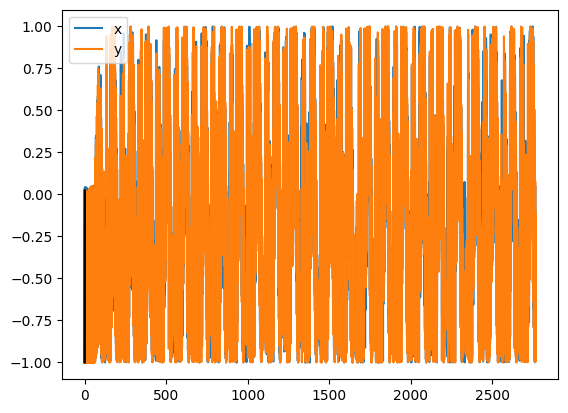

In [21]:
import matplotlib.pyplot as plt

# Plot the arrays and their DTW path
plt.plot(x, label='x')
plt.plot(y, label='y')
for i in range(len(path[0])):
    plt.plot([path[0][i], path[1][i]], [x[path[0][i]], y[path[1][i]]], 'k')
plt.legend()
plt.show()

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.

Step pattern recursion:
 g[i,j] = min(
     g[i-3,j-2] +     d[i-2,j-1] +     d[i-1,j  ] +     d[i  ,j  ] ,
     g[i-1,j-1] +     d[i  ,j  ] ,
     g[i-2,j-3] +     d[i-1,j-2] +     d[i  ,j-1] + 0 * d[i  ,j  ] ,
 ) 

Normalization hint: N



/opt/anaconda3/envs/py38/lib/python3.8/site-packages/dtw/stepPattern.py:339: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(-x[ss, 1], -x[ss, 2], 'o', color="black", marker="o", fillstyle="none")


<AxesSubplot: xlabel='Query index', ylabel='Reference index'>

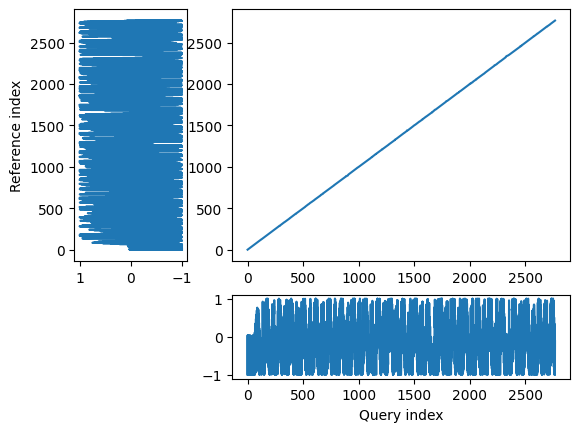

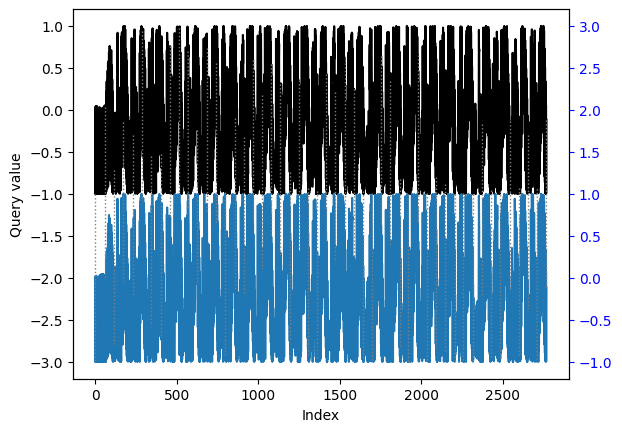

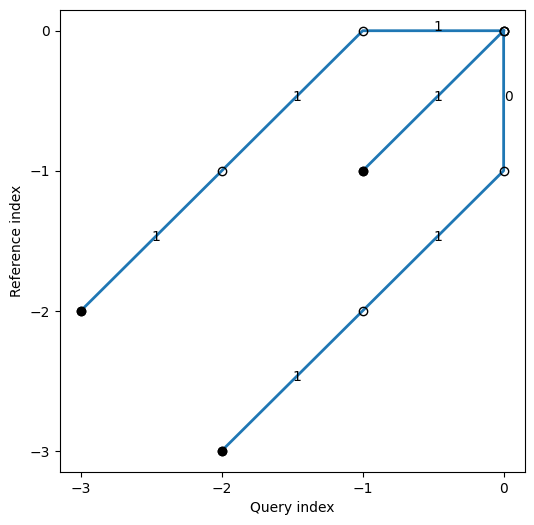

In [22]:
import numpy as np
from dtw import *

## A noisy sine wave as query
idx = np.linspace(0,6.28,num=100)
# query = np.sin(idx) + np.random.uniform(size=100)/10.0

# ## A cosine is for template; sin and cos are offset by 25 samples
# template = np.cos(idx)
query = x
template = y

## Find the best match with the canonical recursion formula
from dtw import *
alignment = dtw(query, template, keep_internals=True)

## Display the warping curve, i.e. the alignment curve
alignment.plot(type="threeway")

## Align and plot with the Rabiner-Juang type VI-c unsmoothed recursion
dtw(query, template, keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-2)

## See the recursion relation, as formula and diagram
print(rabinerJuangStepPattern(6,"c"))
rabinerJuangStepPattern(6,"c").plot()